# Introduction

## Principle of a neural network

- </span><span style="color:Tomato;font-weight: bold;"> Receiving information (signal) </span>

- </span><span style="color:Tomato;font-weight: bold;"> Activation,processing of information by the neuron</span>

- </span><span style="color:Tomato;font-weight: bold;">Transfer of processed information to other neurons </span>

</span><span style="color:white;font-weight: bold;">Reinforcement of certain links = LEARNING </span>

# The perceptron: a 1-layer neural network

-   Mathematical description of how a neuron works

![](images/reseau-1.png)

Information processing

*d*(*X*) = *a*<sub>0</sub> + *a*<sub>1</sub> *x*<sub>1</sub> + *a*<sub>2</sub> *x*<sub>2</sub> + *a*<sub>3</sub> *x*<sub>3</sub>
.

------------------------------------------------------------------------

-   Transfer function <span style="color:Tomato;"> Heaviside </span>

![](images/heaviside-1.png)

Information transferred

1.  If *d*(*X*) \> 0 → *Y* = 1
2.  If *d*(*X*) \< 0 → *Y* = 0

</p>
<p style="background-color:Tomato;color:white;">
Binary classification, the separator is a linear combination of the
starting variables (depending on the dimensions: straight line, plane
etc.)
</p>

------------------------------------------------------------------------

## Example of learning with function `and`

-   Function `and`


|  x1 |  x2 |   y |
|----:|----:|----:|
|   0 |   0 |   0 |
|   0 |   1 |   0 |
|   1 |   0 |   0 |
|   1 |   1 |   1 |

</span><span style="color:MediumSeaGreen;font-weight:bold;"> Main stages of the Neural process </span>

1.  Randomly mix the observations
2.  Randomly initialize the coefficients
    (*a*<sub>0</sub>,*a*<sub>1</sub>,*a*<sub>2</sub>).
3.  Pass the observations one by one
    -   Calculate the prediction error for the observation
    -   Update coefficients
4.  Until convergence of the process (zero error)

→ </span><span style="color:orange; font-weight:bold;"> Separation line
</span>

![](images/unnamed-chunk-2-1.png)

Remark : An observation can be repeated several times.

------------------------------------------------------------------------

-   **Illustration**

Random initialization of coefficients: *a*<sub>0</sub> =  − 0.0.25,
*a*<sub>1</sub> = 0.2 and *a*<sub>2</sub> = 0.05, i.e. 

*d*(*X*) =  − 0.025 + 0.2 *x*<sub>1</sub> + 0.05 *x*<sub>2</sub>

Computation of the separation line, set *d*(*X*) = 0 and get the lines
equation *x*<sub>2</sub> =  − 4.0 *x*<sub>1</sub> + 0.5.

</p>
<p style="background-color:orange;color:white;font-weight:bold&intalic;">
Rules for updating coefficients:
a<sub>j</sub> → a<sub>j</sub> + Δ a<sub>j</sub>
</p>

![](images/unnamed-chunk-3-1.png)

*Δ* *a*<sub>*j*</sub> = *η* (*y*−*ŷ*) *x*<sub>*j*</sub>

-   Learning rate *η*: determines the learning amplitude

    -   Too small → Slow convergence
    -   Too big → oscillation
    -   In the example: 0.1

-   Prediction error (*y*−*ŷ*): determines whether the coefficients need
    to be updated

-   Signal strength of the variable *x*<sub>*j*</sub> (variables are
    generally standardised)

------------------------------------------------------------------------

</span><span style="color:white">An update function is created</span>.

In [18]:

import numpy as np

def maj(a, mydata, eta=0.1, indiv=0, bias=True):
    if bias:
        mydata = np.hstack((np.ones((mydata.shape[0], 1)), mydata))
    
    dX = np.dot(mydata[indiv, :-1], a)
    y_hat = 0 if dX < 0 else 1
    delta_a = np.array([eta * (mydata[indiv, -1] - y_hat) * mydata[indiv, j] for j in range(len(a))])
    
    return a + delta_a

<span style="color:white">We update the coefficients (random
order)</span>

In [19]:
# Example data
mydata = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
])

a_init = np.array([-0.025, 0.200, 0.050])
a_loops1 = maj(a=a_init, mydata=mydata, indiv=2)
a_loops2 = maj(a=a_loops1, mydata=mydata, indiv=3)
#...

print("Updated weights after first iteration:", a_loops1)
print("Updated weights after second iteration:", a_loops2)

Updated weights after first iteration: [-0.125  0.1    0.05 ]
Updated weights after second iteration: [-0.125  0.1    0.05 ]


<span style="color:white">We continue as long as the coefficients (also
called weights) have not been stabilized.</span>

------------------------------------------------------------------------

## Criteria to be optimised

</p>
<p style="background-color:MediumSeaGreen;color:white;font-weight:bold;">
When is the algorithm considered to have converged?
</p>

-   In the example `and`, no more updates are made when the prediction
    error is zero for all individuals. Then, weights are stable and
    define the separation line.

</span><span style="color:orange; font-weight:bold;">Problem: Algorithm
don’t necessarily converges to the true solution (non-linear separation,
for example) or it converges too slowly.</span>

</p>
<p style="background-color:Tomato;color:white;">
Need to define a Loss Function.
</p>

Let’s take the example of the least squares with our `and` use case
where *ŷ*(*ω*) = Heaviside(*d*(*X*(*ω*))), *ω* designates the
individual.

*Loss Function* = ∑<sub>*ω*</sub>(*y*(*ω*)−*ŷ*(*ω*))<sup>2</sup>

1.  A minimum value is set for the Least Square minimization (instead of
    0).
2.  A minimum (significant) reduction of the Least Square is set to
    define if we stop the updating or not.
3.  We set a maximum number of iterations.

</p>
<p style="background-color:Tomato;color:white;">
These parameters (1),(2),(3) become `parameters` of the minimization of
the loss function.
</p>

------------------------------------------------------------------------

## Loss function

For classification, other loss functions are generally used instead of
the least squares. It includes:

-   Binary cross-entropy

∑<sub>*ω*</sub> − *y*(*ω*)ln (*ŷ*(*w*)) − (1−*y*(*ω*))ln (1−*ŷ*(*ω*))

-   Categorical cross-entropy (generalization to more than 2 classes,
    with dummy variables)

∑<sub>*ω*</sub>∑<sub>*i* ∈ *nb.classes*</sub> − *y*<sub>*i*</sub>(*ω*)ln (*ŷ*<sub>*i*</sub>(*ω*))

-   Hinge loss (used in SVM). The variable *Y* is coded { − 1,  + 1}.

∑<sub>*ω*</sub>*max*(0 , 1−*y*(*w*)*ŷ*(*w*))

------------------------------------------------------------------------

## Regularisation
When the explanatory variables are correlated or if the number of
variables *p* exceeds the number of observations *n*, constraints are
set to make the model robust and estimable.

-   Constraints using the *L*<sub>2</sub> norm (Ridge Regression).

*Loss Function*  = ∑<sub>*ω*</sub>(*y*(*ω*)−*ŷ*(*ω*))<sup>2</sup> + *λ*∑<sub>*j*</sub>*a*<sub>*j*</sub><sup>2</sup>

-   Other constraints are possible, such as the *L*<sub>1</sub> norm
    (Lasso)…

The higher the *λ*, the heavier the constraints are imposed on the
coefficients, with the danger of underlearning.

------------------------------------------------------------------------
## Gradient descent algorithm for the loss function

Let’s look at the gradient descent algorithm.

![](/document/imagegradient-1.png)

The update is always incremental,
*a*<sub>*j*</sub> → *a*<sub>*j*</sub> + *Δ* *a*<sub>*j*</sub> where

$$\Delta a_j = -\eta \\ \frac{\partial LossFunction }{\partial a_j}=-\eta \text{ gradient}\_{a_j}$$

------------------------------------------------------------------------

## Usual gradient descent (quadratic loss)

With the least squares loss function
∑<sub>*ω*</sub>(*y*(*ω*)−*ŷ*(*ω*))<sup>2</sup> where
*ŷ*(*ω*) = *f*(*d*(*X*(*ω*)=*a*<sub>0</sub>+…+*a*<sub>*j*</sub>*x*<sub>*j*</sub>(*ω*)+…))
The result is

$$\Delta a_j = -\eta \\ \frac{\partial LossFuntion }{\partial a_j}= -\eta \\ \frac{\partial LossFuntion }{\partial f(d(X))}\frac{\partial f(d(X))}{\partial d(X)}\frac{\partial d(X)}{\partial a_j}$$

Hence
*Δ* *a*<sub>*j*</sub> =  − *η*∑<sub>*ω*</sub>(*y*(*ω*)−*ŷ*(*ω*))*f*′(*d*(*X*(*ω*))) *x*<sub>*j*</sub>(*ω*)

and the update of the weights (*a*<sub>*j*</sub>) is done after
processing all the data (observations *ω*).

→ </span><span style="color:orange; font-weight:bold;"> Slowness problem
</span> because it requires a lot of computations on large databases.

</p>
<p style="background-color:MediumSeaGreen;color:white">
note: in the case of the *L*<sub>2</sub> norm the gradient is slightly
modified to incorporate the constraint.
</p>

*Δ* *a*<sub>*j*</sub> =  − *η* (*y*−*ŷ*)*f*′(*d*(*X*)) *x*<sub>*j*</sub> + *λ* *a*<sub>*j*</sub>

------------------------------------------------------------------------

## Stochastic gradient

</p>
<p style="background-color:Tomato;color:white;">
Stochastic gradient (online)
</p>

You can choose an increment for each individual. Example of quadratic
loss:
*Δ* *a*<sub>*j*</sub> =  − *η* (*y*−*ŷ*)*f*′(*d*(*X*)) *x*<sub>*j*</sub>
This incremental approach (with weights updated as each individual
passes through) speeds up the process. The individuals are mixed
randomly at the start.

→ </span><span style="color:orange; font-weight:bold;"> Instability
problem </span>

</p>
<p style="background-color:Tomato;color:white;">
Stochastic gradient (mini-batch)
</p>

This approach, based on blocks of individuals, makes it possible to
accumulate advantages of the incremental approach (speed of convergence)
with less instability (smoothing).

</p>
<p style="background-color:Tomato;color:white;">
Interest of the stochastic or non-stochastic gradient algorithm.
</p>

1.  No matrix inversion (Allows the use of correlated descriptors)
2.  Can be programmed in very large dimensions
3.  Easy to update if new individuals are added to the database

------------------------------------------------------------------------

## Variant in the gradient descent algorithm

1.  Variable learning rate *η*, a high rate at the start *η*<sub>0</sub>
    to converge quickly which decreases as a function of the iteration
    *s* or the performance of the algorithm:

    -   *η* as a function of *s*:
        $\eta(s) = \frac{\eta_0}{1 + s \\ \eta_d}$ or
        $\eta(s) = \frac{\eta_0}{s^d}$.
    -   Adaptive *η* value: as soon as the gradient stagnates, *η* is
        reduced (e.g. divided by 5).

2.  Update using a memory algorithm: To smooth the path to the minimum
    (to limit oscillations), we can use the update from the previous
    iteration step *s* − 1 to calculate the new update at iteration *s*:

$$\Delta a_j^{(s)} = -\eta \\ \frac{\partial LossFunction }{\partial a_j} + \mu \Delta a_j^{(s-1)}$$

(0≤*μ*\<1) is an additional parameter to be fixed: when (*μ*=0) we have
the usual gradient descent and by default (*μ*=0.9) in scikit-learn.

------------------------------------------------------------------------

## Transfer function: often a Sigmoid function

Let’s take a continuous and therefore derivable transfer function, like
the logistic function *f*, with derivative
*f*′(*ν*) = *f*(*ν*) (1−*f*(*ν*)).

$$\hat{y}(\omega) = f(d(X(\omega)))=\frac{1}{1+e^{-d(X)}}$$

![](images/logistique-1.png)

The function *f* is an estimate of *P*(*Y*/*X*), so the decision rule
becomes :

If f(d(X)) \> 0.5 Then Y=1 Otherwise Y=0

Estimating the probability *P*(*Y*/*X*) can be used later for scoring
purposes.

------------------------------------------------------------------------

## Other activation-transfer functions

Different types of activation functions can be used depending on the
problem to be addressed (classification or regression, linear or
non-linear), the definition of the intermediate spaces and the filtering
required.

![](images/plotdata-1.png)

-   Linear function *f*(*ν*) = *ν*
    <span style="color:MediumSeaGreen;">for regression.</span>

-   ReLu function (Rectified Linear units) *f*(*ν*) = max (0,*ν*)
    <span style="color:MediumSeaGreen;">to filter.</span>

-   Hyperbolic tangent function $f(\nu)=\frac{e^{2\nu}-1}{e^{2\nu}+1}$
    <span style="color:MediumSeaGreen;">for classification.</span> Note:
    The variable *Y* is coded { − 1,  + 1}.

------------------------------------------------------------------------

# Multi-layer perceptron (PMC)

PMC property: has a hidden layer of neurons that can approximate any
continuous function (depends on the number of neurons).

</p>
<p style="background-color:Tomato;color:white;">
The different stages of the PMC
</p>

-   Partition training - testing datasets
-   Pre-treatment
-   PMC
-   Prediction

![The loss function allows coefficients (weights) to be optimised by feedback](images/schema.jpg)

<span style="font-size:50%">Image credit: Deep Learning with R, Chollet
et al</span>

------------------------------------------------------------------------

## Backpropagation

Let *x* = *f*(*w*), *y* = *f*(*x*), *z* = *f*(*y*). We want to compute
the gradient of *z* with respect to *w*:

$$\frac{\partial z}{\partial w}= \frac{\partial z}{\partial y}\frac{\partial y}{\partial x}\frac{\partial x}{\partial w}= f'(y)f'(x)f'(z)$$

![Computational graph for backpropagation](images/computationalgraph.jpg)

<span style="font-size:50%">Image credit: Deep Learning, Goodfellow et
al</span>

------------------------------------------------------------------------

## Limits and benefits of PMC

1.  Highly accurate classifier (if well parameterised) with

-   Incrementality
-   Scalability

2.  Black box model with

-   Difficulty of parameterisation (number of neurons in the hidden
    layer)
-   Convergence problem (local optimum)
-   Danger of overlearning (too many neurons in the hidden layer)

3. the CNN adds: 

- feature detection 
- different scales 
- details 
- already built-in models allows transferring

![Transferring from CNN model](images/transfer_cnn.png)

------------------------------------------------------------------------

## Conclusion Machine and Deep Learning

![](images/ccl.jpg)

<span style="font-size:50%">Image credit: Deep Learning, Goodfellow et
al</span>

------------------------------------------------------------------------

# Use Case
Import the necessary libraries, including pandas, scikit-learn, and PyTorch.

In [28]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt

In [6]:
# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


## Load and Preprocess Wine Data
Load the wine dataset from UCI repository, preprocess the data including train-test split and normalization.

In [7]:
# Load the wine dataset from UCI repository
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine_data = pd.read_csv(url, header=None, names=column_names)

In [8]:
# Display the first few rows of the dataset
wine_data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
# Split the data into features and labels
X = wine_data.drop('Class', axis=1)
y = wine_data['Class']

In [10]:
# Adjust class labels to be in the range [0, C-1]
y = y - 1

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

In [14]:
# Create PyTorch datasets and dataloaders
train_dataset = data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = data.TensorDataset(X_test_tensor, y_test_tensor)
train_loader = data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=32, shuffle=False)

## Perceptron Model with scikit-learn
Implement a Perceptron model using scikit-learn, train it on the wine dataset, and evaluate its performance.

In [15]:
# Implement a Perceptron model using scikit-learn
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

In [16]:
# Train the Perceptron model
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [17]:
# Evaluate the Perceptron model
train_accuracy = perceptron.score(X_train, y_train)
test_accuracy = perceptron.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Test Accuracy: 0.96


In [34]:
# Predictions
y_pred_perceptron = perceptron.predict(X_test)

# Confusion Matrix for Dense Network
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)

print(conf_matrix_perceptron)

[[18  0  0]
 [ 2 19  0]
 [ 0  0 15]]


## Multilayer Perceptron with scikit-learn
Implement a Multilayer Perceptron (MLP) using scikit-learn, train it on the wine dataset, and evaluate its performance.

In [18]:
# Implement a Multilayer Perceptron (MLP) using scikit-learn
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.0001,
                    solver='adam', random_state=42, tol=1e-4)

In [19]:
# Train the MLP model
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [20]:
# Evaluate the MLP model
train_accuracy_mlp = mlp.score(X_train, y_train)
test_accuracy_mlp = mlp.score(X_test, y_test)

print(f'MLP Training Accuracy: {train_accuracy_mlp:.2f}')
print(f'MLP Test Accuracy: {test_accuracy_mlp:.2f}')

MLP Training Accuracy: 1.00
MLP Test Accuracy: 1.00


In [33]:
# Predictions
y_pred_mlp = mlp.predict(X_test)

# Confusion Matrix for MPL
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

print(conf_matrix_mlp)

[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


## Dense Network with PyTorch
Implement a Dense Network using PyTorch, train it on the wine dataset, and evaluate its performance.

In [ ]:
# Define the Dense Network model using PyTorch without class definition
input_size = X_train.shape[1]
hidden_size = 100
output_size = len(y.unique())

model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size)#,
    #nn.Softmax(dim=1) # Softmax is not needed in the final layer for CrossEntropyLoss
    # as it applies softmax internally
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 300

In [22]:
# Train the Dense Network model
losses = []  # List to store loss values
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())  # Store the loss value
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/300], Loss: 0.5722
Epoch [100/300], Loss: 0.5550
Epoch [150/300], Loss: 0.5537
Epoch [200/300], Loss: 0.5523
Epoch [250/300], Loss: 0.5525
Epoch [300/300], Loss: 0.5517


In [23]:
# Evaluate the Dense Network model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    test_accuracy_dense = correct / total
    print(f'Dense Network Test Accuracy: {test_accuracy_dense:.2f}')

Dense Network Test Accuracy: 1.00


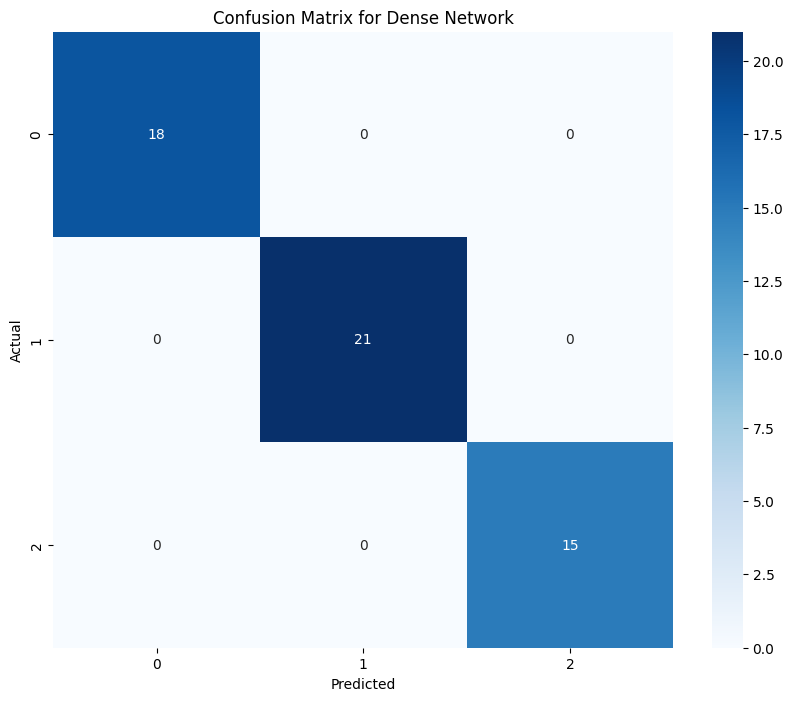

tensor([[3.7137e-03, 4.3488e-01, 5.6141e-01],
        [8.3914e-07, 1.0000e+00, 4.1530e-08],
        [1.5182e-06, 1.0000e+00, 5.5801e-08],
        [3.5449e-05, 6.1539e-07, 9.9996e-01],
        [3.5085e-04, 9.9933e-01, 3.1543e-04],
        [2.5370e-04, 9.9862e-01, 1.1242e-03],
        [8.8273e-05, 9.9990e-01, 1.2357e-05],
        [9.9998e-01, 1.6949e-05, 2.5453e-06],
        [3.8524e-05, 8.7285e-04, 9.9909e-01],
        [1.0000e+00, 2.7404e-06, 1.6247e-06],
        [1.0000e+00, 3.3461e-07, 4.2143e-07],
        [9.9988e-01, 5.9136e-05, 5.9339e-05],
        [1.0000e+00, 3.2696e-07, 1.8133e-07],
        [1.4078e-06, 1.0000e+00, 1.7145e-06],
        [3.1519e-08, 1.0000e+00, 1.0980e-08],
        [1.0000e+00, 5.8446e-08, 2.1777e-07],
        [2.2600e-05, 1.5537e-06, 9.9998e-01],
        [1.0000e+00, 4.9241e-08, 2.5117e-07],
        [7.9142e-08, 1.0000e+00, 1.5281e-08],
        [2.3174e-06, 1.0000e+00, 1.7814e-06],
        [5.9019e-05, 5.7879e-04, 9.9936e-01],
        [9.9997e-01, 1.5880e-05, 1

In [29]:
# Use the DataLoader to iterate on test data
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Passez les données à travers le modèle pour obtenir les probabilités
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix for Dense Network
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot of the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Dense Network')
plt.show()        
        
# Individual class probabilities
print(outputs)

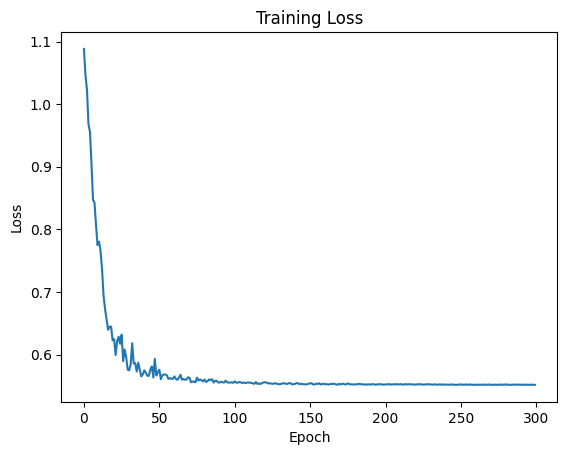

In [30]:
# Plot the training loss
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

## Appendix : Class definition

In [36]:
# Define the Dense Network model using PyTorch
class DenseNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DenseNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

In [37]:
# Set the parameters for the model
input_size = X_train.shape[1]
hidden_size = 100
output_size = len(y.unique())
learning_rate = 0.001
num_epochs = 300

In [ ]:
# Initialize the model, loss function, and optimizer
model = DenseNetwork(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the Dense Network model
losses = []  # List to store loss values
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())  # Store the loss value
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/300], Loss: 0.0305
Epoch [100/300], Loss: 0.0148
Epoch [150/300], Loss: 0.0049
Epoch [200/300], Loss: 0.0032
Epoch [250/300], Loss: 0.0012
Epoch [300/300], Loss: 0.0008


In [ ]:
# Evaluate the Dense Network model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    test_accuracy_dense = correct / total
    print(f'Dense Network Test Accuracy: {test_accuracy_dense:.2f}')

Dense Network Test Accuracy: 1.00


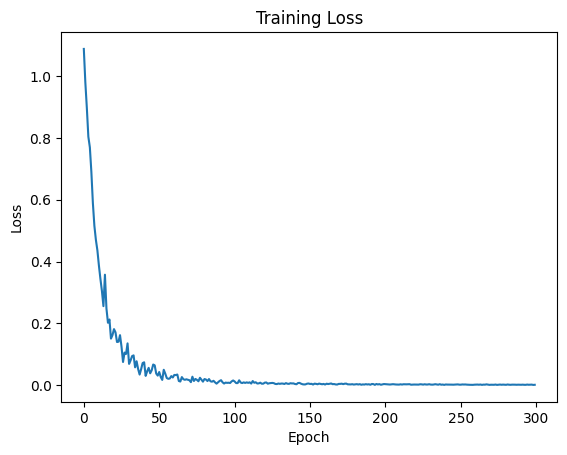

In [ ]:
# Plot the training loss
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()